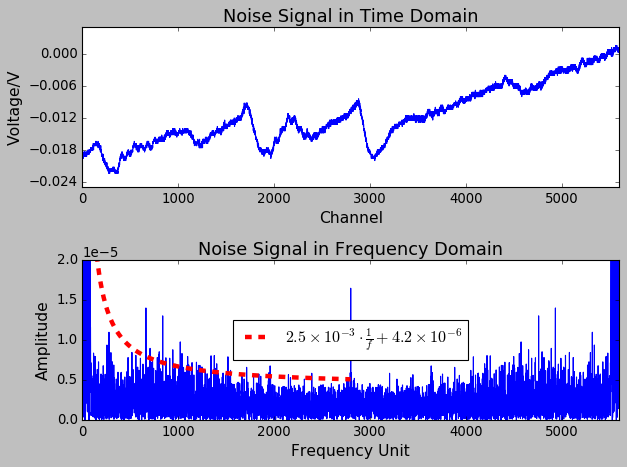

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

data = np.genfromtxt("noise_edit.csv", delimiter=',')
channel = data[1:, 0]
amplitude = data[1:, 1]

fs = len(channel) / (channel[-1] - channel[0])
F = np.fft.fft(amplitude) / len(amplitude)
freq = np.arange(0, len(channel))

foo = channel[100:len(channel)//2]
p = np.polyfit(foo**-1, F.real[100:len(channel)//2], 1)
p = np.poly1d(p)

plt.style.use("classic")

plt.subplot(211)
plt.plot(channel, amplitude)
plt.title("Noise Signal in Time Domain", fontsize=16)
plt.xlabel("Channel", fontsize=14)
plt.ylabel("Voltage/V", fontsize=14)
plt.xlim(0 ,channel[-1])
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(6))

plt.subplot(212)
plt.plot(freq, abs(F.real))
plt.plot(foo, 2.5 * 10**-3 * channel[100:len(channel)//2]**-1 + 4.2 * 10**-6, 
         'r--', linewidth=4, label=r"$2.5 \times 10^{-3} \cdot \frac{1}{f}+4.2\times10^{-6}$")
plt.title("Noise Signal in Frequency Domain", fontsize=16)
plt.xlabel("Frequency Unit", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)
plt.xlim(0 ,channel[-1])
plt.ylim(0, 0.00002)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend(loc="best")

plt.tight_layout()
plt.savefig("noise.time-freq.png", dpi=450)

In [6]:
whos

Variable    Type       Data/Info
--------------------------------
F           ndarray    5599: 5599 elems, type `complex128`, 89584 bytes
amplitude   ndarray    5599: 5599 elems, type `float64`, 44792 bytes
channel     ndarray    5599: 5599 elems, type `float64`, 44792 bytes
data        ndarray    5600x3: 16800 elems, type `float64`, 134400 bytes (131.25 kb)
freq        ndarray    1: 1 elems, type `float64`, 8 bytes
fs          float64    1.0001786352268667
np          module     <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
plt         module     <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
